In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\SUBBU\Desktop\All files\Data')

In [3]:
# List all files in the current working directory
os.listdir()

['Accuracy.png',
 'all_trees.png',
 'banglore_home_prices_model.pickle',
 'bank_customer_churn.csv',
 'bhp.csv',
 'Cleaned data.png',
 'columns.json',
 'Confusion_Matrix.png',
 'Data.csv',
 'Features considered.png',
 'management_both.png',
 'rajaji_nagar_outliers.png',
 'ROC curves for DecisionTreeClassifier.png']

In [4]:
# Importing data
data = pd.read_csv('bank_customer_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Shape of the data
data.shape

(10000, 14)

In [6]:
# All features in the data
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Remove unwanted features from data
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# Categorical features
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['Geography', 'Gender'], dtype='object')

In [10]:
# Unique values in categorical features
for i in cat_feat:
    print(f'{i} : {data[i].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [11]:
# Numerical features
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
# Summary of numerical features
num_feat.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Duplicate values
data.duplicated().sum()

0

In [14]:
# Null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Outliers by descriptive method
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
1%,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
5%,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
10%,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [16]:
data['Exited'] = data['Exited'].astype(str)

In [17]:
data['Exited'].unique()

array(['1', '0'], dtype=object)

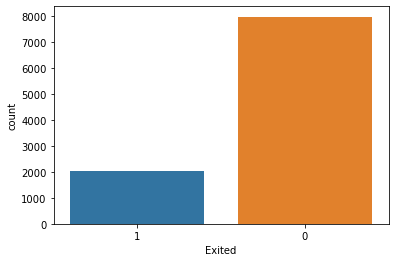

In [18]:
sns.countplot(data=data, x='Exited');

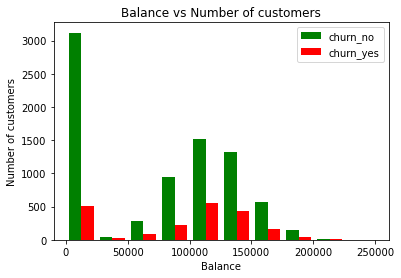

In [19]:
# Churn of customers with respective to monthly charges
bal_churn_no = data[data.Exited =='0'].Balance
bal_churn_yes = data[data.Exited =='1'].Balance

plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.title('Balance vs Number of customers')

plt.hist([bal_churn_no, bal_churn_yes], color=['green', 'red'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

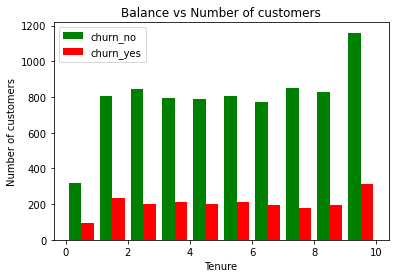

In [20]:
# Churn of customers with respective to monthly charges
tenure_churn_no = data[data.Exited =='0'].Tenure
tenure_churn_yes = data[data.Exited =='1'].Tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Balance vs Number of customers')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

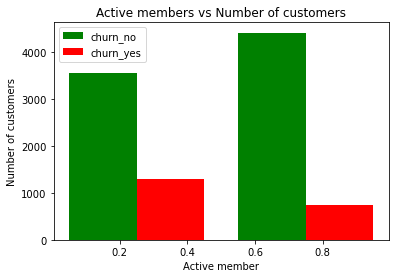

In [21]:
# Churn of customers with respective to monthly charges
bal_churn_no = data[data.Exited =='0'].IsActiveMember
bal_churn_yes = data[data.Exited =='1'].IsActiveMember

plt.xlabel('Active member')
plt.ylabel('Number of customers')
plt.title('Active members vs Number of customers')

plt.hist([bal_churn_no, bal_churn_yes], color=['green', 'red'], label=['churn_no', 'churn_yes'], bins=2)
plt.legend()
plt.show()

In [22]:
# Feature encoding
data.select_dtypes(include='O').columns

Index(['Geography', 'Gender', 'Exited'], dtype='object')

In [23]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [24]:
data = pd.get_dummies(data=data, columns=['Geography'])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [25]:
data.shape

(10000, 13)

In [26]:
data['Exited'] = pd.to_numeric(data['Exited'])

In [27]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [28]:
scale_columns = ['CreditScore', 'Tenure', 'Age', 'Balance', 'NumOfProducts','EstimatedSalary']

In [29]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[scale_columns] = scaler.fit_transform(data[scale_columns])

In [30]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [31]:
# Declare independent and dependent features
X = data.drop('Exited', axis=1)
y = data['Exited']

In [32]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train.shape

(7500, 12)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
data.shape

(10000, 13)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(6, input_shape = (12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
235/235 [==============================] - 2s 3ms/step - loss: 0.5586 - accuracy: 0.7643
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4779 - accuracy: 0.7959
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.8019
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8059
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.8027
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.8072
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.8083
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.8097
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.8129
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8099

In [39]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8288


[0.386265367269516, 0.8288000226020813]

In [40]:
yp = model.predict(X_test)
yp[:5]

79/79 [==============================] - 0s 2ms/step


array([[0.16418421],
       [0.06552662],
       [0.24175541],
       [0.3268101 ],
       [0.06487062]], dtype=float32)

In [41]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [42]:
y_pred = []
for i in yp:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
from sklearn.metrics import accuracy_score, classification_report

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8288

In [45]:
accuracy

0.8288

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2003
           1       0.68      0.26      0.38       497

    accuracy                           0.83      2500
   macro avg       0.76      0.62      0.64      2500
weighted avg       0.81      0.83      0.80      2500

